# Access Control Effector - Investigate and Compare Response Times
This notebook helps to analyze single response-time.csv files to understand the nature of the response times.

In [131]:
base_path <- "data/probe-experiment-node2"

library(ggplot2)
library(magrittr)
library(ggpubr)
library(repr)
library(reshape2)
library(nlme)

model_sizes <- c(1,2,3,4,5,6,7,8,9,
                 10,11,12,13,14,15,16,17,18,19,
                 20,30,40,50,60,70,80,90,95,
                 100,110,120,130,140,150,
                 200,300,400,
                 500,550,560,570,580,590,
                 600,
                 700,710,720,730,740,750,
                 800,
                 900,950,960,970,980,990,
                 1000,1010,1020,1030,1040,1050,
                 2000,3000,4000,5000,6000,7000,8000,9000,
                 10000)
experiment <- 1

values <- c()
ids <- c()

runtime <- c()

i <- 0
for (model_size in model_sizes) {
    data_path <- sprintf("%s/exp-%d/%d/response-time/response-time.csv", base_path, experiment, model_size)

    if (file.exists(data_path)) {
        if (file.size(data_path) > 0) {
            data <- read.csv(data_path, header=TRUE)

            data <- data[ which(data$event.type == 'AfterOperationEvent'), ]

            base_time <- data[1,4]

            data[,4] <- (data[,4] - base_time)/1000/1000/1000
            data[,3] <- data[,3]/1000/1000/1000

            p <- ggplot(data, aes(x=time, y=response.time, linetype = task, color = task)) + 
                scale_color_discrete(name = "Task", 
                    breaks = c("org.iobserve.selenium.behavior.tasks.jpetstore.common.LoginJPetStoreTask",
                               "org.iobserve.selenium.behavior.tasks.jpetstore.account.ChangeAccountInformationTask",
                               "org.iobserve.selenium.behavior.tasks.jpetstore.account.ViewOrderTask"), 
                    labels = c("LoginJPetStoreTask", "ChangeAccountInformationTask", "ViewOrderTask")) +
                geom_point() + 
                xlab("Runtime (s)") + 
                ylab("Response Time (s)")

            hist <- data$response.time[which(data$response.time < 0.25)]

            i <- i + 1
            
            print(sprintf("row %d size %d", model_size, length(hist)))
            
            values <- c(values, hist)
            ids <- c(ids, rep(model_size, length(hist)))

            print(sprintf("Processing %s", data_path))
        } else {
            print(sprintf("File %s is empty.", data_path))
        }
    } else {
        print(sprintf("File %s is missing", data_path))
    }  
}

histograms <- data.frame(id=ids, value=values)

[1] "row 1 size 3800"
[1] "Processing data/probe-experiment-node2/exp-1/1/response-time/response-time.csv"
[1] "row 2 size 3761"
[1] "Processing data/probe-experiment-node2/exp-1/2/response-time/response-time.csv"
[1] "row 3 size 3862"
[1] "Processing data/probe-experiment-node2/exp-1/3/response-time/response-time.csv"
[1] "row 4 size 3838"
[1] "Processing data/probe-experiment-node2/exp-1/4/response-time/response-time.csv"
[1] "row 5 size 3728"
[1] "Processing data/probe-experiment-node2/exp-1/5/response-time/response-time.csv"
[1] "row 6 size 3849"
[1] "Processing data/probe-experiment-node2/exp-1/6/response-time/response-time.csv"
[1] "row 7 size 3776"
[1] "Processing data/probe-experiment-node2/exp-1/7/response-time/response-time.csv"
[1] "row 8 size 3843"
[1] "Processing data/probe-experiment-node2/exp-1/8/response-time/response-time.csv"
[1] "row 9 size 3642"
[1] "Processing data/probe-experiment-node2/exp-1/9/response-time/response-time.csv"
[1] "row 10 size 3674"
[1] "Processin

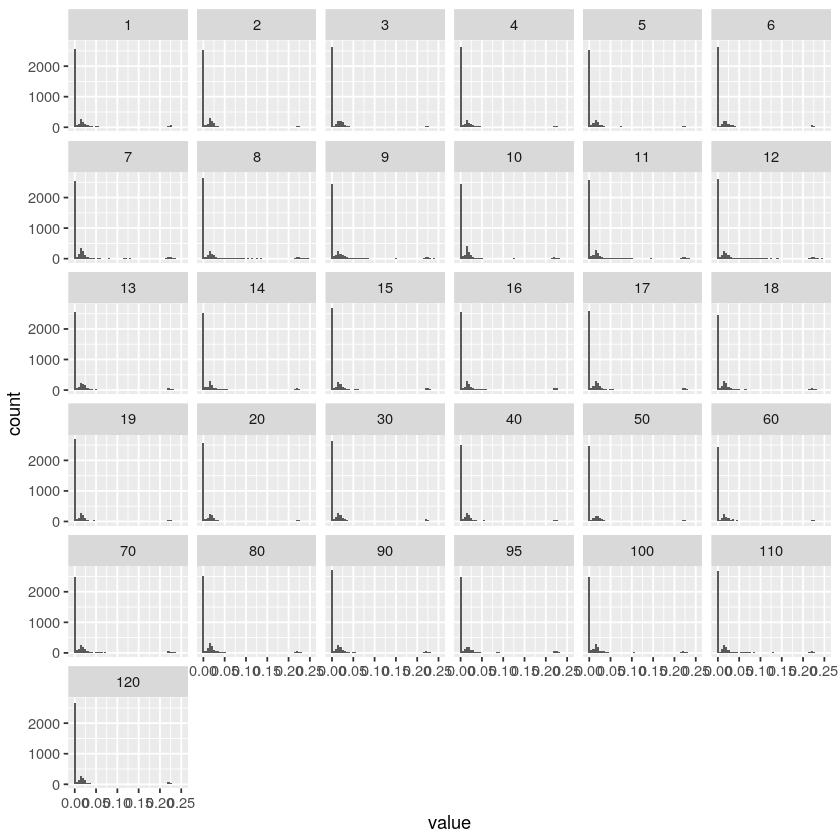

In [135]:
ggplot(data=histograms) + geom_histogram(aes(x=value), binwidth=0.005) + facet_wrap(~id)